# SCC-ICMC-USP - 1o. semestre de 2023
# SCC5871/MAI5025 - APRENDIZADO DE MÁQUINA
# **Exercício 4**

### Profa. Roseli A. F. Romero

### Monitor: Diogo Godoi

### OBJETIVO: ARVORE DE DECISÃO PARA:
* **CLASSIFICAÇÃO** - PARTE 1
* **REGRESSÃO** - PARTE 2

### Alunos:
- Gabriel Bortoli (5378290)
- Lucas Maretti (6789752)


# Parte 1

O dataset ["Breast Cancer Wisconsin"](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic) é um dataset que contém 699 instâncias, cada uma com 10 atributos númericos e 1 atributo correspondente a classe. A idéia do dataset é conseguir classificar um tumor como benigno ou maligno a partir de 10 variáveis descritivas. Foi adicionado um cabeçalho no arquivo original para facilitar seu manuseio. Valores ausentes são representados pelo caractere '?'

---


### Questão 01.
Carregue o dataset a partir do arquivo fornecido. Depois conte quantos valores ausentes existem para cada atributo.

In [79]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics

In [80]:
# Leitura do dataset (disponível no sklearn ou https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

X, y = load_breast_cancer(return_X_y= True, as_frame= True)
data = pd.concat([X,y], axis = 1)

In [81]:
# Verificação de valores ausentes (não há).
# PS: Um outro dataset (hepatitis) tinha valores ausentes representados por '?'.

print(X.isna().sum().sum())
print(y.isna().sum())

0
0


In [82]:
# Verificação das colunas. Há 10 variáveis, sendo que para cada há 3 valores: mean, error e worst. Todas serão usadas.

X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [83]:
print(y.value_counts())

1    357
0    212
Name: target, dtype: int64


---
### Questão 02.
Separe o conjunto em $80\%$ treino e $20\%$ teste.

In [84]:
# Separação entre treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X , y,
                                                    shuffle = True,
                                                    test_size = 0.2,
                                                    stratify= y,
                                                    random_state = 42)

# Mostrando os valores de cada conjunto:
print('Shape atributos de treino:', X_train.shape)
print('Shape atributos de teste:', X_test.shape)
print('Shape target de treino:', y_train.shape)
print('Shape target de teste:', y_test.shape, '\n')

# Proporção de resultados mantida (stratify):
print(y_train.value_counts())
print(y_test.value_counts())

Shape atributos de treino: (455, 30)
Shape atributos de teste: (114, 30)
Shape target de treino: (455,)
Shape target de teste: (114,) 

1    285
0    170
Name: target, dtype: int64
1    72
0    42
Name: target, dtype: int64


## Questão 03.

Substitua os valores ausentes utilizando a estratégia de média. Utilize a média do conjunto de treinamento para substituir valores faltantes no teste. 

In [85]:
# No dataset em questão não há valores faltantes. Mas caso houvesse, poderiamos usar o SimpleImputer para adicionar os valores:

from sklearn.impute import SimpleImputer

df_original = [[np.nan,2,3],[4,np.nan,6],[7,8,np.nan]]

addMean = SimpleImputer(missing_values=np.nan, strategy='mean')
df_new = addMean.fit_transform(df_original)

print(df_original,'\n')
print(df_new)

[[nan, 2, 3], [4, nan, 6], [7, 8, nan]] 

[[5.5 2.  3. ]
 [4.  5.  6. ]
 [7.  8.  4.5]]


---
### Questão 04.
Separe os dados em 80% para treinar e 20% para validadr.
Treine um Classificador usando o método de Árvore de Decisão (`sklearn.tree.DecisionTreeClassifier`)  no conjunto de treino e extraia a acurácia, precisão e recall no conjunto de teste.

In [86]:
# Separação entre treino e teste feita na questão 2.

# Objeto com o classificador:
clf = DecisionTreeClassifier()

# Treinamento:
clf = clf.fit(X_train, y_train)

# Predição:
y_pred = clf.predict(X_test)

###

# Métricas:
acuracia = metrics.accuracy_score(y_test, y_pred)
precisao = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print(f'Acurácia do modelo: {acuracia*100:.2f}%')
print(f'Precisão do modelo: {precisao*100:.2f}%')
print(f'Recall do modelo: {recall*100:.2f}%')

Acurácia do modelo: 88.60%
Precisão do modelo: 95.38%
Recall do modelo: 86.11%


-----
### Questão 05.

Visualize a árvore de decisão resultante (`sklearn.tree.plot_tree`) do treinamento e diga quais são a feature mais informativa. Justifique. 

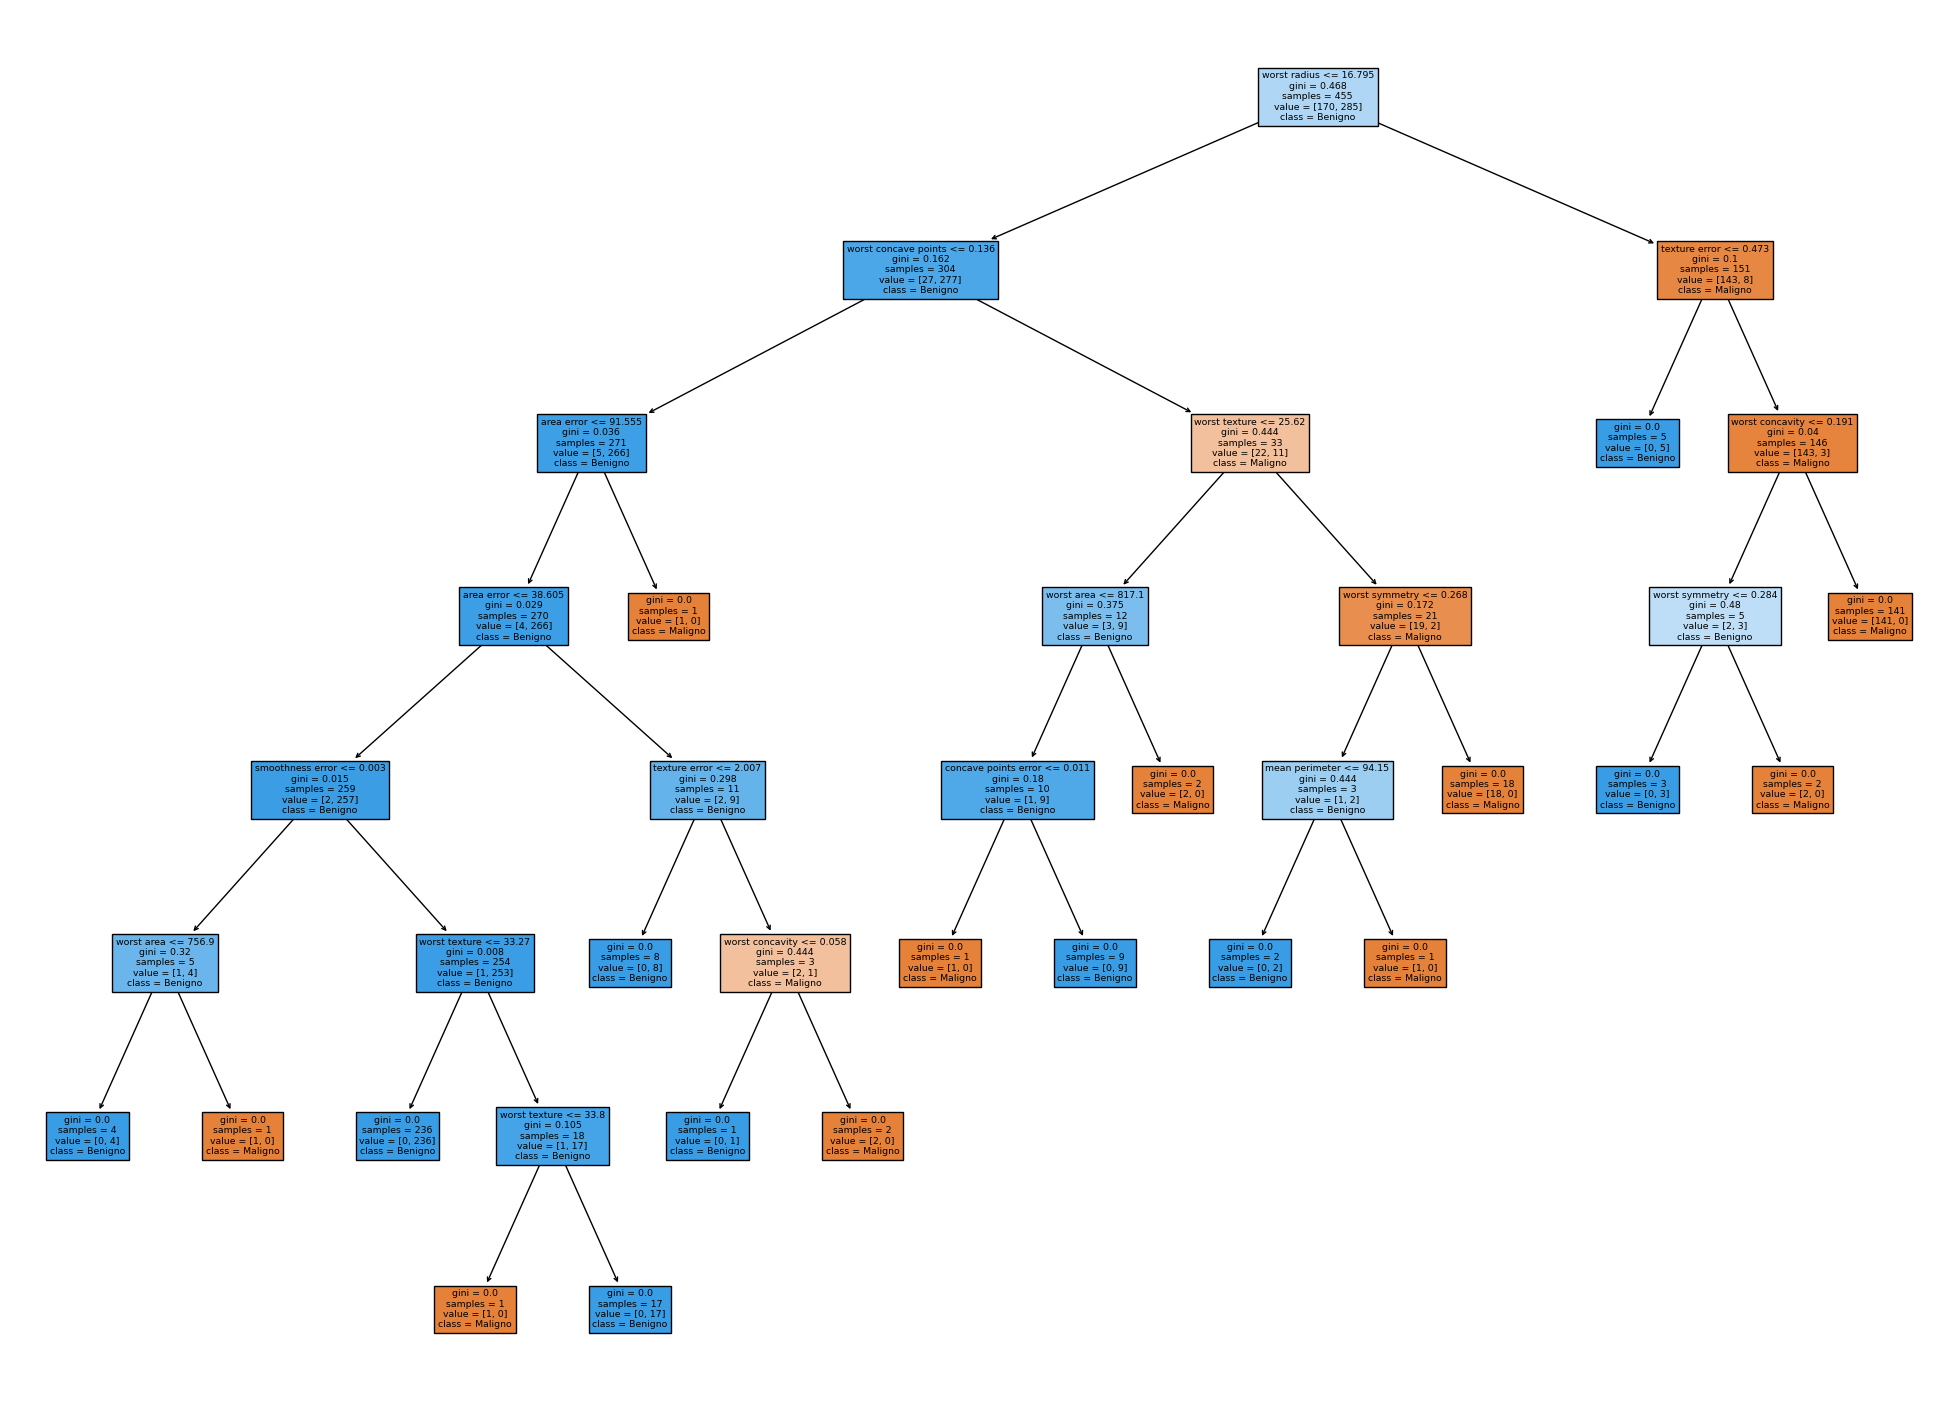

In [87]:
# Visualizando a árvore de decisão:
fig = plt.figure(figsize=(25,18))
_ = plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=['Maligno','Benigno'],
                   filled=True)

# Podemos dizer que as 3 features mais importantes são as 3 primeiras, acima no gráfico: 'worst radius', 'worst concave points' e 'texture error'.

In [88]:
# Dicionário com os atributos mais importantes, de acordo com o Gini Score, que valida a impressão anterior.
# OS 3 primeiros atributos têm a importância relativa de ~70%, ~12% e ~6%, respectivamente, somando quase 90%.

feat_dict= {}
for col, val in sorted(zip(X.columns, clf.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=round(val*100,2)

print(feat_dict)

{'worst radius': 69.78, 'worst concave points': 11.61, 'texture error': 5.27, 'worst texture': 4.01, 'worst concavity': 2.26, 'worst symmetry': 2.2, 'worst area': 2.02, 'area error': 1.21, 'concave points error': 0.85, 'mean perimeter': 0.63, 'smoothness error': 0.18, 'mean radius': 0.0, 'mean texture': 0.0, 'mean area': 0.0, 'mean smoothness': 0.0, 'mean compactness': 0.0, 'mean concavity': 0.0, 'mean concave points': 0.0, 'mean symmetry': 0.0, 'mean fractal dimension': 0.0, 'radius error': 0.0, 'perimeter error': 0.0, 'compactness error': 0.0, 'concavity error': 0.0, 'symmetry error': 0.0, 'fractal dimension error': 0.0, 'worst perimeter': 0.0, 'worst smoothness': 0.0, 'worst compactness': 0.0, 'worst fractal dimension': 0.0}


-----
# Parte 2

Considere o arquivo `houses_to_rent_v2.csv`. Esta base tem dados de imóveis para 5 cidades do Brasil. Esta base pode ser usada tanto pelo proprietário quanto pelo locatário. Pretende-se que um proprietario
tenha uma estimativa do preço que pode alugar seu imóvel, através de seus atributos. Por outro lado, pretende-se que um locatário possa estimar se o aluguel é condizente.

### Questão 1 
 
 - Separe o conjunto em treinamento (80%) e teste (20%)
 - Verifique se é necessário um preprocessamento nos dados. Justifique o(s) tipo (s) de preprocessamento que foram feitos
 - Dica: O Sklearn não trabalha com atributos nominais na árvore de decisão

In [89]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('houses_to_rent_v2.csv', na_values='-')
# Vamos ignorar algumas colunas para simplificar o problema
df = df[['city', 'rooms', 'bathroom', 'parking spaces', 'furniture', 'fire insurance (R$)', 'rent amount (R$)']]
df = df.reset_index(drop=True)
print("Quantidade de registros: ",df.shape[0],"\n")
print(df.info())

Quantidade de registros:  10692 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   rooms                10692 non-null  int64 
 2   bathroom             10692 non-null  int64 
 3   parking spaces       10692 non-null  int64 
 4   furniture            10692 non-null  object
 5   fire insurance (R$)  10692 non-null  int64 
 6   rent amount (R$)     10692 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 584.8+ KB
None


In [90]:
# Seu código começa aqui

# Copiando o dataframe:
df_rent = df.copy()

# Vamos trocar a variável nominal 'furniture' por 0 (not furnished) e 1 (furnished):
df_rent['furniture'] = df_rent['furniture'].replace({'furnished':1,'not furnished':0})

# Também vamos criar um dicionário com as cidades e transformá-las em números:
cities = {i:c/4 for c,i in enumerate(df_rent['city'].unique())}
#cities = {i:c for c,i in enumerate(df_rent['city'].unique())}
df_rent['city'] = df_rent['city'].replace(cities)

# Agora vamos colcoar todos os valores no intervalo de 0 a 1 com o MinMaxScaler, principalmente devido a grande diferença de valores entre os atributos (média menor que 3 para room/bathroom/parking/furniture e quase 4000 pra rent).
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_rent)
df_rent[df_rent.columns[:]] = data_scaled

# Vamos visualizar alguns registros e também ver algumas informações:
df_rent.head(5)

,city,rooms,bathroom,parking spaces,furniture,fire insurance (R$),rent amount (R$)
0,0.00,0.083333,0.000000,0.083333,1.0,0.057864,0.063973
1,0.00,0.250000,0.333333,0.000000,0.0,0.089021,0.101235
2,0.25,0.000000,0.000000,0.083333,0.0,0.056380,0.052750
3,0.25,0.083333,0.000000,0.000000,0.0,0.020772,0.014860
4,0.00,0.000000,0.000000,0.000000,0.0,0.011869,0.007856


In [91]:
cities

{'São Paulo': 0.0,
 'Porto Alegre': 0.25,
 'Rio de Janeiro': 0.5,
 'Campinas': 0.75,
 'Belo Horizonte': 1.0}

In [92]:
# Agora vamos separar entre os conjuntos de treino e teste:

A = df_rent.iloc[:, :-1]
b = df_rent.iloc[:,-1:]

A_train, A_test, b_train, b_test = train_test_split(A , b,
                                                    shuffle = True,
                                                    test_size = 0.2,
                                                    random_state = 42)

# Mostrando os valores de cada conjunto:
print('Shape atributos de treino:', A_train.shape)
print('Shape atributos de teste:', A_test.shape)
print('Shape target de treino:', b_train.shape)
print('Shape target de teste:', b_test.shape)

Shape atributos de treino: (8553, 6)
Shape atributos de teste: (2139, 6)
Shape target de treino: (8553, 1)
Shape target de teste: (2139, 1)


### Questão 2

Treine um modelo de regressão com o método de Árvore de Decisão (DT), no conjunto de treino e calcule o Mean Squared Error (MSE) e o R2 no conjunto de teste.

- Dica: Utilize `sklearn.tree.DecisionTreeRegressor`

In [149]:
# Seu código começa aqui

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(A_train,b_train)
b1_pred = dtr.predict(A_test)

mse_1 = mean_squared_error(b_test, b1_pred)
r2_1 = r2_score(b_test, b1_pred)

print(f'MSE: {mse_1:.4f}')
print(f'R2 Score: {r2_1:.4f}')


MSE: 0.0001
R2 Score: 0.9776


### Questão 3

Treine um modelo de regressão com o método Random Forest (RF), no conjunto de treino e calcule o Mean Squared Error (MSE) e o R2 no conjunto de teste.

- Dica: Utilize `sklearn.ensemble.RandomForestRegressor`

In [94]:
# Seu código começa aqui

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state = 0)
rfr.fit(A_train,b_train)
b2_pred = rfr.predict(A_test)

mse_2 = mean_squared_error(b_test, b2_pred)
r2_2 = r2_score(b_test, b2_pred)

print(f'MSE: {mse_2:.4f}')
print(f'R2 Score: {r2_2:.4f}')

C:\Users\gabri\AppData\Local\Temp\ipykernel_14284\943900801.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(A_train,b_train)


MSE: 0.0001
R2 Score: 0.9863


### Questão 4

Usando o melhor modelo, qual seria a estimativa do valor do aluguel para a cidade de Campinas de um apartamento com 2 dormitórios, 1 banheiro, 1 vaga de garagem, sem mobilia e com seguro de incêndio de 50 reais?

In [134]:
# Seu código começa aqui

# O melhor modelo foi o Random Forest, que teve o mesmo MSE do Decision Tree, porém com R2 score centesimamente melhor.

# Como usamos o MinMaxScaler, vamos ter que transformar o array com os dados do imóvel para o formato transformado.
imovel1 = np.array([0.75,3,2,2,0,100,1000]).reshape(1,-1) # O último valor, 1000, é apenas temporário, para fazer o cálculo.
imovel_temp1 = scaler.transform(imovel1)
# Aqui fazemos o fit apenas com os 6 primeiros valores:
aluguel_temp1 = rfr.predict(imovel_temp1[:,:6])
# E finalmente, fazemos a transformação inversa do aluguel, para pegar o valor em reais:
valor_temp1 = np.array([0,0,0,0,0,0,aluguel_temp1]).reshape(1,-1)
aluguel1 = scaler.inverse_transform(valor_temp1)
print(f'O valor do aluguel com os parâmetros fornecidos será de:\nR${aluguel1[0][6]:.2f}\n\n')

O valor do aluguel com os parâmetros fornecidos será de:
R$7146.86




C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\gabri\AppData\Local\Temp\ipykernel_14284\1484551206.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  valor_temp1 = np.array([0,0,0,0,0,0,aluguel_temp1]).reshape(1,-1)


### Questão 5

Usando o melhor modelo, qual seria a estimativa do valor do aluguel para a cidade de Porto Alegre de um apartamento com 1 dormitório, 1 banheiro, com 1 vaga de garagem, sem mobilia e seguro de incêndio de 25 reais?



In [138]:
# Seu código começa aqui

# Como usamos o MinMaxScaler, vamos ter que transformar o array com os dados do imóvel para o formato transformado.
imovel2 = np.array([0.25,1,1,1,0,25,1000]).reshape(1,-1) # O último valor, 1000, é apenas temporário, para fazer o cálculo.
imovel_temp2 = scaler.transform(imovel2)
# Aqui fazemos o fit apenas com os 6 primeiros valores:
aluguel_temp2 = rfr.predict(imovel_temp2[:,:6])
# E finalmente, fazemos a transformação inversa do aluguel, para pegar o valor em reais:
valor_temp2 = np.array([0,0,0,0,0,0,aluguel_temp2]).reshape(1,-1)
aluguel2 = scaler.inverse_transform(valor_temp2)
print(f'O valor do aluguel com os parâmetros fornecidos será de:\nR${aluguel2[0][6]:.2f}\n\n')

O valor do aluguel com os parâmetros fornecidos será de:
R$1647.79




C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\gabri\AppData\Local\Temp\ipykernel_14284\936727058.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  valor_temp2 = np.array([0,0,0,0,0,0,aluguel_temp2]).reshape(1,-1)
